### Template Matching

Simple template matching example. Note template matching is not very robust due to obvious reasons that once different orientaitons, colors and sizes are of the template are in the image it will not be matched. 

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image = mpimg.imread('examples/bbox-example-image.jpg')
# image = mpimg.imread('temp-matching-example-2.jpg')
templist = ['examples/cutout1.jpg', 'examples/cutout2.jpg', 'examples/cutout3.jpg',
            'examples/cutout4.jpg', 'examples/cutout5.jpg', 'examples/cutout6.jpg']

In [15]:
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [16]:
# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Make a copy of the image to draw on
    # Define an empty list to take bbox coords
    bbox_list = []
    for template_str in template_list:
        template = cv2.imread(template_str)
        res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        top_left = min_loc
        w, h = template.shape[1::-1]
        bottom_right = (top_left[0] + w, top_left[1] + h)
        bbox_list.append((top_left, bottom_right))
    return bbox_list


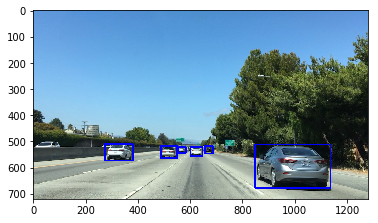

In [17]:
bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)

### Color Histogram

Simple Color Histogram example. Histogram color sample is a little better but almost completely ignores the shape of the image which means 2 object with the same color aspect ratio would be matched incorrectly for example.

In [19]:
# load example
image = mpimg.imread('examples/cutout1.jpg')

In [20]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    # Take histograms in R, G, and B
    rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
    ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
    bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

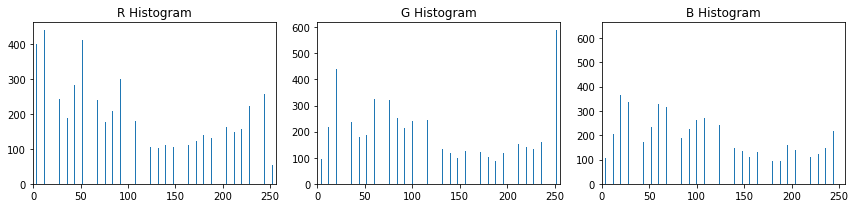

In [21]:
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

### Explore Color Spaces

Here's some code to generate a 3D plot of pixels in different color spaces

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

In [37]:
def plot_spaces(img):

    # Select a small fraction of pixels to plot by subsampling it
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

    # Convert subsampled image to desired color space(s)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

    # Plot and show
    print("Original")
    plt.imshow(img)

    print("RGB")
    plot3d(img_small_RGB, img_small_rgb)
    plt.show()

    print("HSV")
    plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    plt.show()

Original
RGB


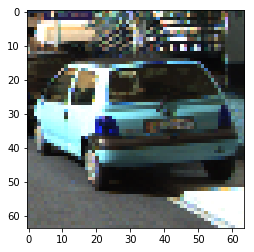

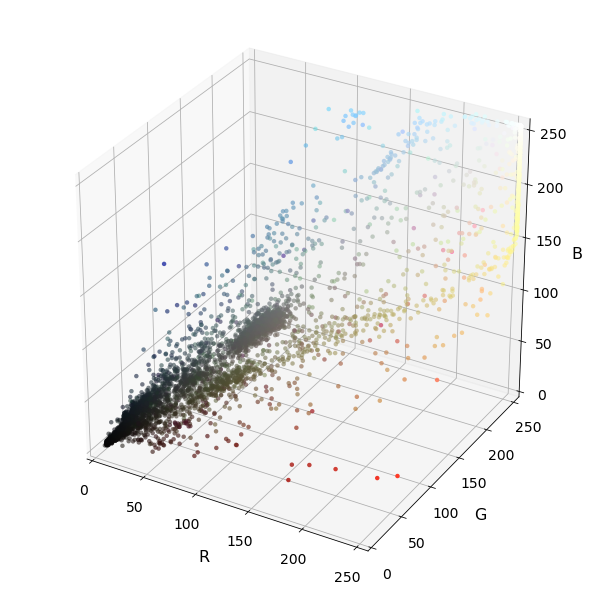

HSV


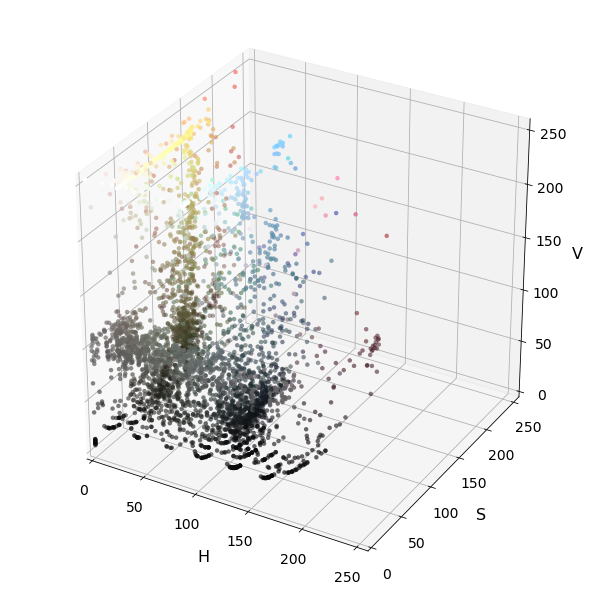

In [38]:
plot_spaces(cv2.imread("examples/25.png"))

Original
RGB


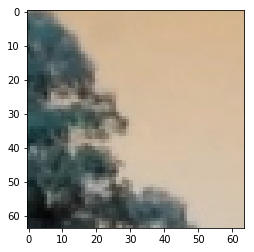

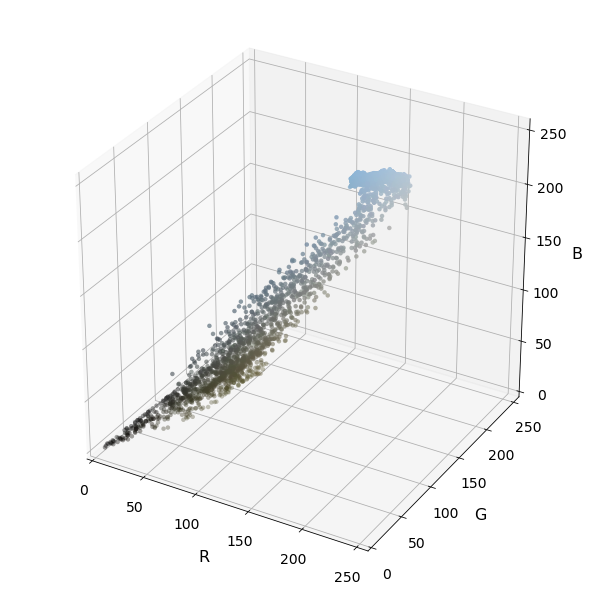

HSV


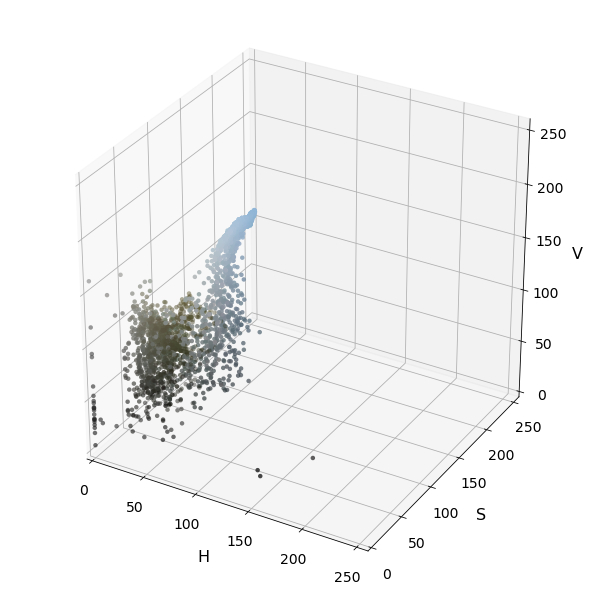

In [39]:
plot_spaces(cv2.imread("examples/2.png"))

Original
RGB


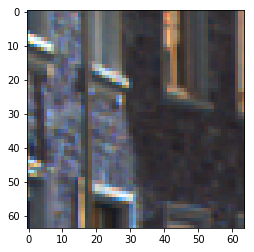

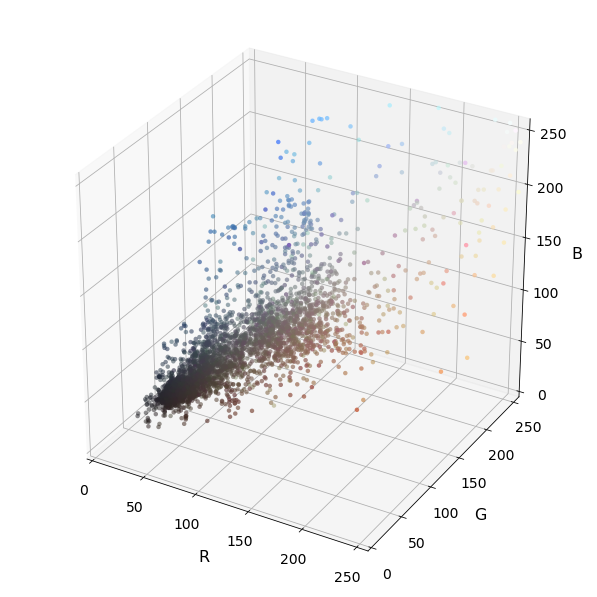

HSV


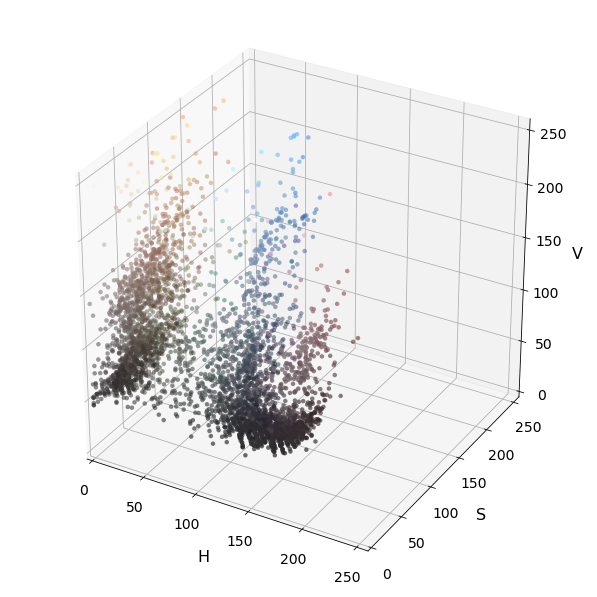

In [40]:
plot_spaces(cv2.imread("examples/3.png"))

Original
RGB


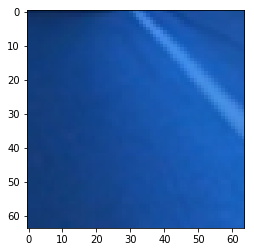

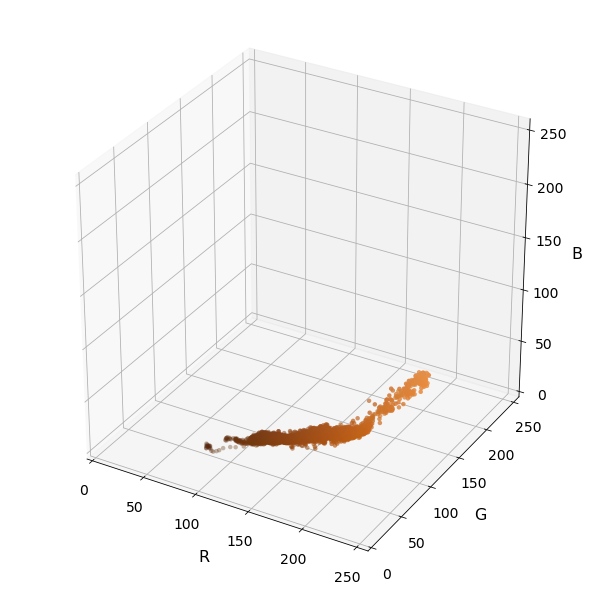

HSV


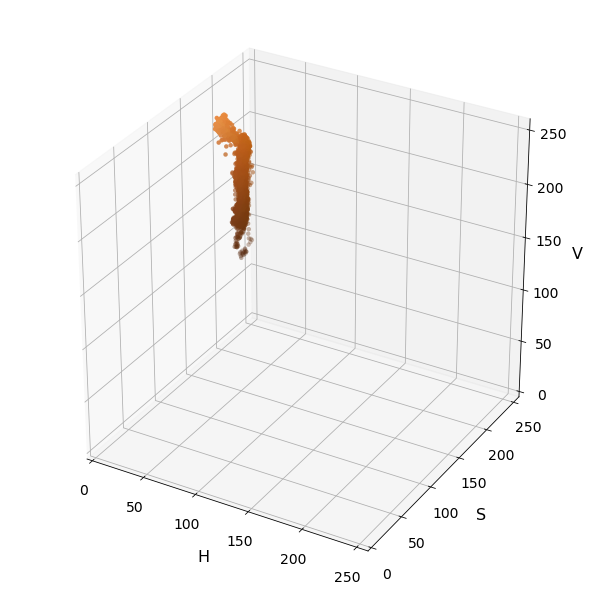

In [43]:
plot_spaces(cv2.imread("examples/8.png"))

Original
RGB


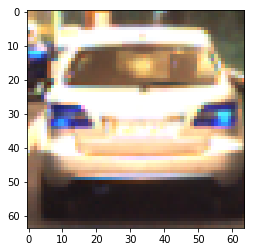

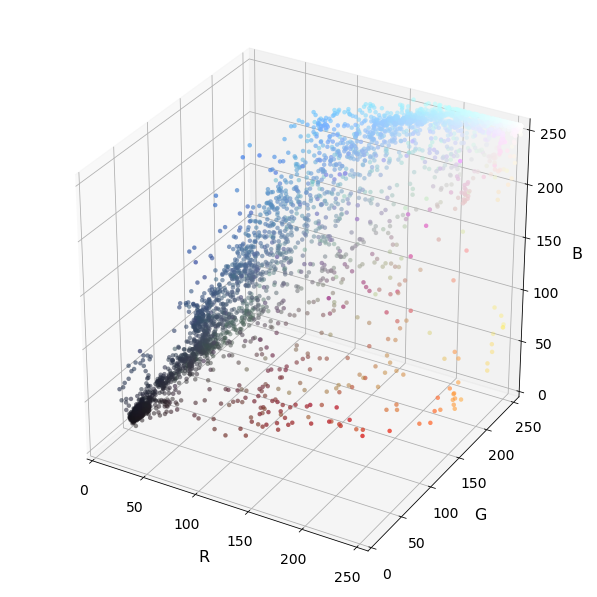

HSV


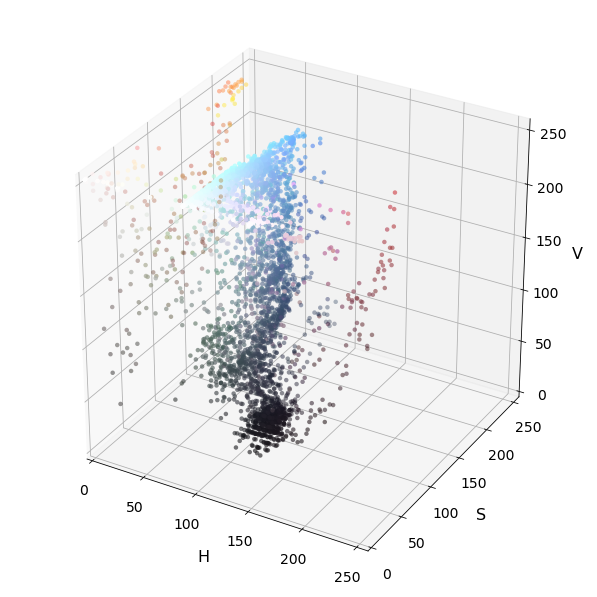

In [42]:
plot_spaces(cv2.imread("examples/31.png"))